In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

results27-02-2024 11:33:50.csv


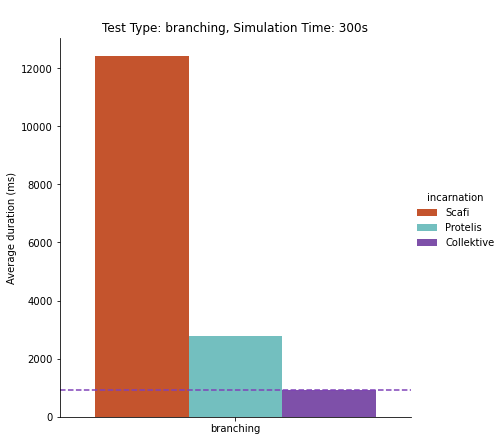

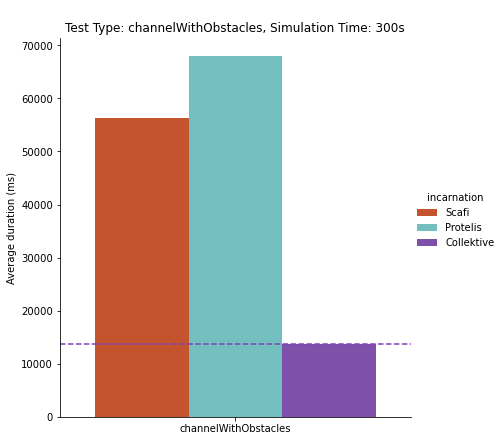

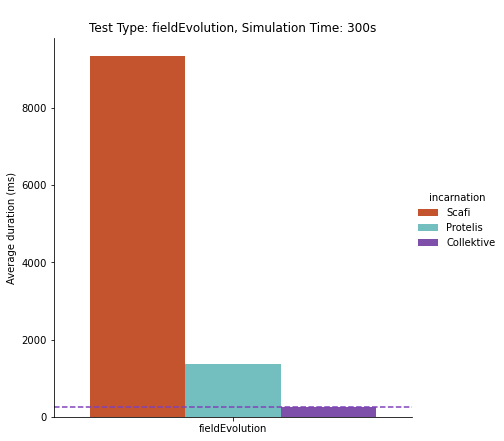

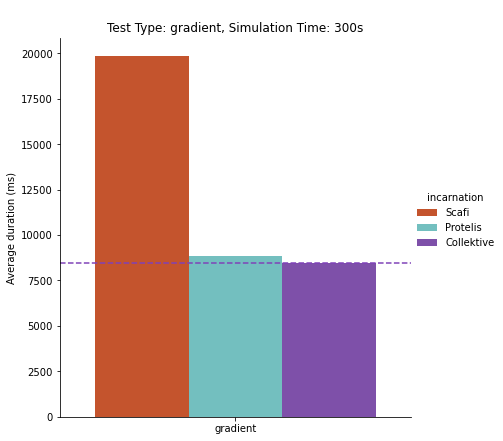

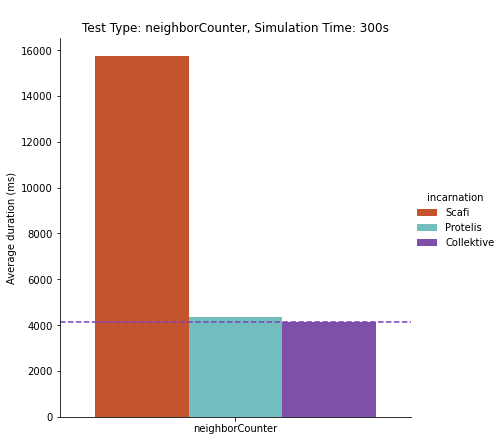

In [2]:
# Get the directory of the current Python script
script_directory = os.path.dirname(os.path.abspath("plotting"))

# Combine it with the directory name where your CSV files are located
# directory = os.path.join(script_directory, 'results')

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(script_directory) if file.endswith('.csv')]
sorted_files = sorted(csv_files, key=lambda x: os.path.getctime(os.path.join(script_directory, x)), reverse=True)
last_file_name = sorted_files[0]
print(last_file_name)
# Load the dataset
df = pd.read_csv(last_file_name, header=None, names=["incarnation", "test_type", "average", "simulation_time"])
df["incarnation"] = df["incarnation"].map(lambda x: x.capitalize())
grouped_df = df.groupby(["test_type", df["simulation_time"].astype(int)])

# Define custom palette
custom_palette = {
    "Collektive": "#7F41B8",  # Purple color for collektive
    "Scafi": "#DD4814",        # Scala programming language color for scafi
    "Protelis": "#66CCCC"      # Light green color for protelis
}

output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each group and create the plot
for group_name, group_data in grouped_df:
    g = sns.catplot(
        data=group_data, kind="bar",
        x="test_type", y="average", hue="incarnation",
        palette=custom_palette, height=6
    )
    
    # Find the lowest average value and its corresponding incarnation
    lowest_test_type = group_data.loc[group_data["average"].idxmin()]["incarnation"]
    lowest_avg_value = group_data["average"].min()
    
    # Add a horizontal line indicating the lowest average value
    g.ax.axhline(y=lowest_avg_value, color=custom_palette[lowest_test_type], linestyle="--", 
                label=f"{lowest_test_type} lowest")
    
    # Set plot title and labels
    g.set(title=f"\nTest Type: {group_name[0]}, Simulation Time: {group_name[1]}s",
          xlabel="", ylabel="Average duration (ms)")
    
    # Save the plot as a PDF file
    filename = f"{group_name[0]}_{group_name[1]}.png"
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, format="png")
    
plt.show()

In [3]:
df.head(15)

,incarnation,test_type,average,simulation_time
0,Scafi,fieldEvolution,9345.0,300.0
1,Protelis,fieldEvolution,1364.0,300.0
2,Collektive,fieldEvolution,247.0,300.0
3,Scafi,neighborCounter,15751.0,300.0
4,Protelis,neighborCounter,4341.0,300.0
5,Collektive,neighborCounter,4139.0,300.0
6,Scafi,branching,12425.0,300.0
7,Protelis,branching,2797.0,300.0
8,Collektive,branching,934.0,300.0
9,Scafi,gradient,19861.0,300.0


In [4]:
df['test_type']

0           fieldEvolution
1           fieldEvolution
2           fieldEvolution
3          neighborCounter
4          neighborCounter
5          neighborCounter
6                branching
7                branching
8                branching
9                 gradient
10                gradient
11                gradient
12    channelWithObstacles
13    channelWithObstacles
14    channelWithObstacles
Name: test_type, dtype: object

In [5]:
test_types = ['fieldEvolution', 'neighborCounter', 'branching', 'gradient', 'channelWithObstacles']

for tt in test_types:
    df_tt = df[df['test_type'] == tt]
    df_s = df_tt[df_tt['incarnation'] == 'Scafi']['average']
    df_c = df_tt[df_tt['incarnation'] == 'Collektive']['average']
    df_p = df_tt[df_tt['incarnation'] == 'Protelis']['average']
    delta_cs = df_s.iloc[0] / df_c.iloc[0]
    delta_cp = df_p.iloc[0] / df_c.iloc[0]
    print(f'In test type {tt}')
    print(f'Collektive is {delta_cs} times faster than Scafi and {delta_cp} times faster than Protelis')

In test type fieldEvolution
Collektive is 37.83400809716599 times faster than Scafi and 5.522267206477733 times faster than Protelis
In test type neighborCounter
Collektive is 3.8055085769509542 times faster than Scafi and 1.0488040589514376 times faster than Protelis
In test type branching
Collektive is 13.302997858672377 times faster than Scafi and 2.9946466809421843 times faster than Protelis
In test type gradient
Collektive is 2.3501360785705834 times faster than Scafi and 1.0467400307655899 times faster than Protelis
In test type channelWithObstacles
Collektive is 4.080732749257838 times faster than Scafi and 4.925494171312722 times faster than Protelis


In [6]:
script_directory = os.path.dirname(os.path.abspath("plotting"))

csv_files = [file for file in os.listdir(script_directory) if file.endswith('.csv')]
sorted_files = sorted(csv_files, key=lambda x: os.path.getctime(os.path.join(script_directory, x)), reverse=True)
last_file_name = sorted_files[0:3]

print(last_file_name)

['results27-02-2024 11:33:50.csv', 'results27-02-2024 10:44:11.csv', 'results27-02-2024 09:57:33.csv']


In [7]:
concat = []
n = [3, 8, 13]
for file in last_file_name:
    d = pd.read_csv(file, header=None, names=["incarnation", "test_type", "average", "simulation_time"])
    d["incarnation"] = d["incarnation"].map(lambda x: x.capitalize())
    print(n[last_file_name.index(file)])
    d['distance'] = n[last_file_name.index(file)]   
    concat.append(d)
    
df = pd.concat(concat, ignore_index=True)



3
8
13


In [8]:
df.head(16)

,incarnation,test_type,average,simulation_time,distance
0,Scafi,fieldEvolution,9345.0,300.0,3
1,Protelis,fieldEvolution,1364.0,300.0,3
2,Collektive,fieldEvolution,247.0,300.0,3
3,Scafi,neighborCounter,15751.0,300.0,3
4,Protelis,neighborCounter,4341.0,300.0,3
5,Collektive,neighborCounter,4139.0,300.0,3
6,Scafi,branching,12425.0,300.0,3
7,Protelis,branching,2797.0,300.0,3
8,Collektive,branching,934.0,300.0,3
9,Scafi,gradient,19861.0,300.0,3


In [9]:

# Define custom palette
custom_palette = {
    "Collektive": "#7F41B8",  # Purple color for collektive
    "Scafi": "#DD4814",        # Scala programming language color for scafi
    "Protelis": "#66CCCC"      # Light green color for protelis
}

output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

test_types = ['fieldEvolution', 'neighborCounter', 'branching', 'gradient', 'channelWithObstacles']

In [10]:
def mk_chart_exp(experiment, df):
    df_scafi = df[df['incarnation'] == 'Scafi']
    df_protelis = df[df['incarnation'] == 'Protelis']
    df_collektive = df[df['incarnation'] == 'Collektive']
   
    results = pd.DataFrame(columns=['incarnation', 'value', 'distance'])
    
    custom_palette = {
#         "CS": "#7F41B8",  # Purple color for collektive
        "Scafi": "#DD4814",        # Scala programming language color for scafi
        "Protelis": "#66CCCC"      # Light green color for protelis
    }

    for distance in df['distance'].unique():
    # Calculate delta for Scafi
        delta_scafi = df_scafi[df_scafi['distance'] == distance]['average'].iloc[0] / df_collektive[df_collektive['distance'] == distance]['average'].iloc[0]    
        # Calculate delta for Protelis
        delta_protelis = df_protelis[df_protelis['distance'] == distance]['average'].iloc[0] / df_collektive[df_collektive['distance'] == distance]['average'].iloc[0]
        row_cs = {'incarnation': 'Scafi','value': delta_scafi, 'distance': distance}
        row_cp = {'incarnation': 'Protelis','value': delta_protelis, 'distance': distance}
        results = results.append(row_cs, ignore_index=True)
        results = results.append(row_cp, ignore_index=True)
    print(results)
    
    # Reshape the DataFrame for Seaborn
    #results_melted = results.melt(id_vars='distance', var_name='Incarnation', value_name='Delta')

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results, x='distance', y='value', hue='incarnation', palette=custom_palette)
    #sns.barplot(data=results, x='distance', y='CP')
    plt.title(f'Scafi vs Collektive and Protelis vs Collektive for experiment {experiment}', fontsize=20)
    plt.xlabel(f'Simulation\'s linking listance', fontsize=20)
    plt.ylabel('Collektive speedup', fontsize=20)
    plt.xticks(rotation=45)
    plt.show()
    plt.close()

  incarnation      value distance
0       Scafi  37.834008        3
1    Protelis   5.522267        3
2       Scafi  32.147436        8
3    Protelis   5.692308        8
4       Scafi  11.040404       13
5    Protelis   3.212121       13


/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

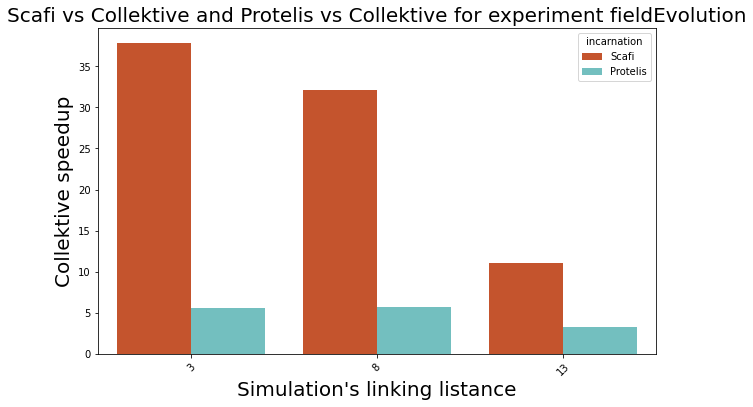

/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation     value distance
0       Scafi  3.805509        3
1    Protelis  1.048804        3
2       Scafi  3.456252        8
3    Protelis  1.097883        8
4       Scafi  2.534328       13
5    Protelis  1.002985       13


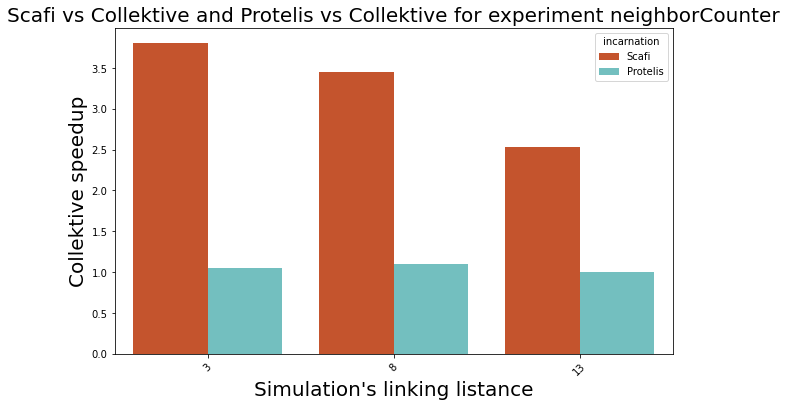

/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation      value distance
0       Scafi  13.302998        3
1    Protelis   2.994647        3
2       Scafi  15.599593        8
3    Protelis   3.441057        8
4       Scafi   7.592727       13
5    Protelis   2.509091       13


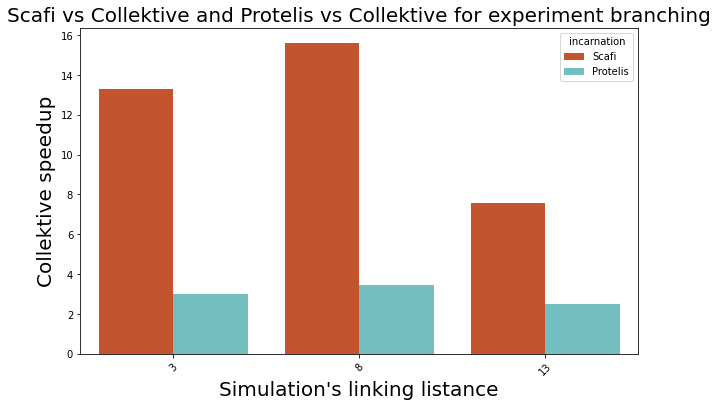

/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation     value distance
0       Scafi  2.350136        3
1    Protelis   1.04674        3
2       Scafi  2.779215        8
3    Protelis  1.592912        8
4       Scafi  2.357642       13
5    Protelis  1.334665       13


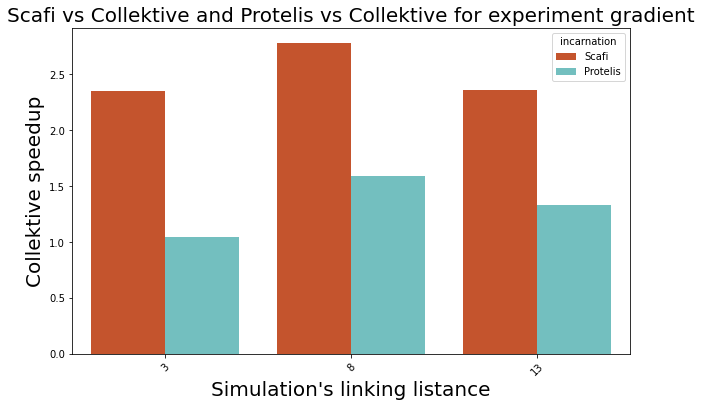

/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_20421/1332292193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation     value distance
0       Scafi  4.080733        3
1    Protelis  4.925494        3
2       Scafi  6.081259        8
3    Protelis   5.50586        8
4       Scafi  3.214555       13
5    Protelis   4.62372       13


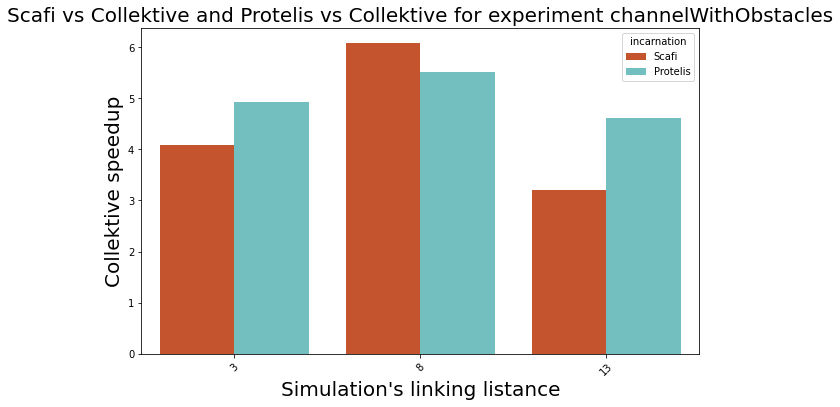

In [11]:

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Get unique test types
test_types = df['test_type'].unique()

# Iterate over each test type
for test_type in test_types:
    # Filter data for the current test type
    df_tt = df[df['test_type'] == test_type]
    
    mk_chart_exp(test_type, df_tt)
    
    
    #Filter data for each incarnation
